In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from sklearn.preprocessing import LabelEncoder
import warnings # Supress warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
np.random.seed(7)

# 数据导入

In [5]:
a = pd.read_csv(r"data/行业日负荷数据.csv",encoding = 'gb2312')
a.head()

,行业类型,数据时间,有功功率最大值（kw）,有功功率最小值（kw）
0,大工业用电,2019/1/1,117888.3300,51526.5690
1,大工业用电,2019/1/2,126843.7914,63638.4294
2,大工业用电,2019/1/3,130286.1294,102048.2754
3,大工业用电,2019/1/4,133018.6344,104466.0762
4,大工业用电,2019/1/5,133504.4784,99507.3528


In [6]:
df = pd.read_csv(r"data/行业日负荷数据.csv",encoding = 'gb2312')
metrics_df=pd.pivot_table(df,values='有功功率最大值（kw）',index='数据时间',columns='行业类型')
metrics_df.head()


行业类型,商业,大工业用电,普通工业,非普工业
数据时间,,,,
2019/1/1,64027.8582,117888.3300,6179.9364,NaN
2019/1/10,144992.7153,123156.6018,9690.6846,NaN
2019/1/11,143797.0083,123400.7388,8421.3138,NaN
2019/1/12,102870.5328,113420.7912,6113.1345,NaN
2019/1/13,124603.7418,99806.6688,5908.7964,NaN


In [7]:
metrics_df1=pd.pivot_table(df,values='有功功率最小值（kw）',index='数据时间',columns='行业类型')
metrics_df1.head()

行业类型,商业,大工业用电,普通工业,非普工业
数据时间,,,,
2019/1/1,23758.7970,51526.5690,4093.0467,NaN
2019/1/10,19104.5562,100170.5898,3898.9248,NaN
2019/1/11,19187.9259,99387.8736,4021.5240,NaN
2019/1/12,17073.3141,88231.8480,3575.0190,NaN
2019/1/13,14190.0240,81903.0432,3615.9144,NaN


In [8]:
metrics_df['数据时间'] = metrics_df.index
metrics_df1['数据时间'] = metrics_df1.index
metrics_df.head()

行业类型,商业,大工业用电,普通工业,非普工业,数据时间
数据时间,,,,,
2019/1/1,64027.8582,117888.3300,6179.9364,NaN,2019/1/1
2019/1/10,144992.7153,123156.6018,9690.6846,NaN,2019/1/10
2019/1/11,143797.0083,123400.7388,8421.3138,NaN,2019/1/11
2019/1/12,102870.5328,113420.7912,6113.1345,NaN,2019/1/12
2019/1/13,124603.7418,99806.6688,5908.7964,NaN,2019/1/13


In [9]:
metrics_df= metrics_df.rename(columns={'数据时间':'date'})
metrics_df1= metrics_df1.rename(columns={'数据时间':'date'})
metrics_df.head()

行业类型,商业,大工业用电,普通工业,非普工业,date
数据时间,,,,,
2019/1/1,64027.8582,117888.3300,6179.9364,NaN,2019/1/1
2019/1/10,144992.7153,123156.6018,9690.6846,NaN,2019/1/10
2019/1/11,143797.0083,123400.7388,8421.3138,NaN,2019/1/11
2019/1/12,102870.5328,113420.7912,6113.1345,NaN,2019/1/12
2019/1/13,124603.7418,99806.6688,5908.7964,NaN,2019/1/13


In [10]:
metrics_df = pd.DataFrame(metrics_df.reset_index())
metrics_df1 = pd.DataFrame(metrics_df1.reset_index())
metrics_df.head()

行业类型,数据时间,商业,大工业用电,普通工业,非普工业,date
0,2019/1/1,64027.8582,117888.3300,6179.9364,NaN,2019/1/1
1,2019/1/10,144992.7153,123156.6018,9690.6846,NaN,2019/1/10
2,2019/1/11,143797.0083,123400.7388,8421.3138,NaN,2019/1/11
3,2019/1/12,102870.5328,113420.7912,6113.1345,NaN,2019/1/12
4,2019/1/13,124603.7418,99806.6688,5908.7964,NaN,2019/1/13


# 数据划分(百分之80是训练集，百分之20是验证集)

In [11]:
train_size = int(0.8 * len(metrics_df1))
test_size = len(df) - train_size
df = metrics_df.fillna(0)
univariate_df = df[['date', '商业']].copy()
univariate_df.columns = ['ds', 'y']
univariate_df['ds'] = pd.to_datetime(univariate_df['ds'], format="%Y-%m-%d")

univariate_df = pd.pivot_table(univariate_df,values='y',index='ds')
# train = univariate_df.iloc[:train_size, :]
# x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
# x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])
# print(len(train), len(x_valid))
univariate_df.head()

,y
ds,
2019-01-01,64027.8582
2019-01-02,75467.2143
2019-01-03,132776.9442
2019-01-04,97731.1308
2019-01-05,132883.1868


In [12]:
train_start_dt = '2021-1-21'
# train_end_dt = '2020-7-3'
test_start_dt = '2021-7-3'
# test_end_dt = '2021-9-3'

In [13]:
univariate_df[(univariate_df.index < test_start_dt) & (univariate_df.index >= train_start_dt)][['y']].rename(columns={'y':'train'})

,train
ds,
2021-01-21,45596.0376
2021-01-22,47764.5426
2021-01-23,45227.9550
2021-01-24,44652.6252
2021-01-25,46887.0654
...,...
2021-06-28,94243.7706
2021-06-29,93299.0796
2021-06-30,94739.1234


# 可视化差异

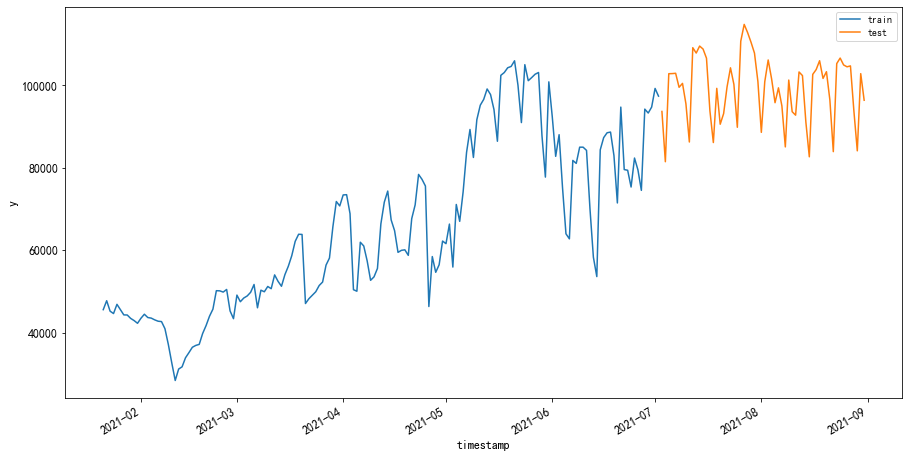

In [14]:
univariate_df[(univariate_df.index < test_start_dt) & (univariate_df.index >= train_start_dt)][['y']].rename(columns={'y':'train'}) \
    .join(univariate_df[test_start_dt:][['y']].rename(columns={'y':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.savefig('./one.jpg')
plt.show()

# 季节性分析

NameError: name 'ts' is not defined

<Figure size 3600x3600 with 0 Axes>

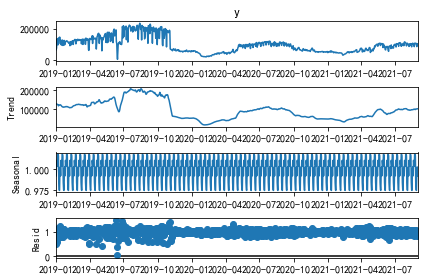

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

#季节性分解
decomposition = seasonal_decompose(univariate_df['y'],period=12, extrapolate_trend='freq',model="multiplicative")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
 
plt.figure(figsize=[50, 50])
decomposition.plot()
print("test: p={}".format(ts.adfuller(seasonal)[1]))
 
#季节平稳性检测
stationarity = judge_stationarity(residual)

# 准备训练数据

In [519]:
train = univariate_df.copy()[(univariate_df.index >= train_start_dt) & (univariate_df.index <= test_start_dt)][['y']]
test = univariate_df.copy()[univariate_df.index >= test_start_dt][['y']]
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (163, 1)
Test data shape:  (60, 1)


# 差分

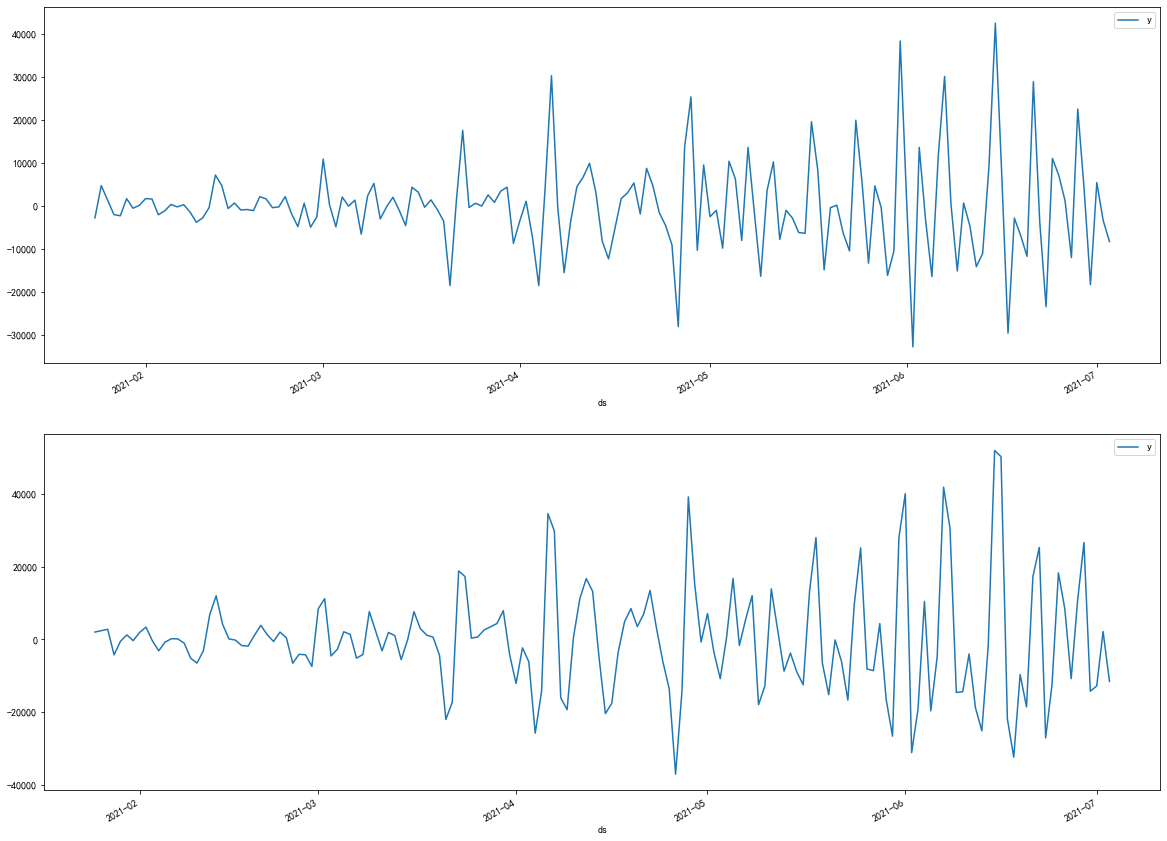

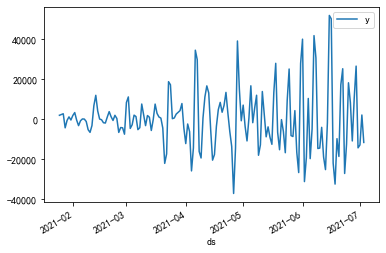

In [520]:
# 差分

train= train.diff(2)
test= test.diff(2)
fig = plt.figure(figsize=(20,16))
ax1= fig.add_subplot(211)
diff1 = train.diff(1)
diff1.plot(ax=ax1)

ax2= fig.add_subplot(212)
diff2 = train.diff(2)
diff2.plot(ax=ax2)


ax = diff2.plot()
fig = ax.get_figure()


In [521]:
train.dropna(axis=0, how='any', inplace=True)
test.dropna(axis=0, how='any', inplace=True)

# 使用StandardScaler()对训练数据进行标准化。

In [501]:
from sklearn.preprocessing import StandardScaler

In [502]:
scaler = StandardScaler()
train['y'] = scaler.fit_transform(train)
test.dropna(axis=0, how='any', inplace=True)
train.dropna(axis=0, how='any', inplace=True)
train.head(10)
# test.head(10)

,y
ds,
2021-01-30,0.243342
2021-01-31,0.069866
2021-02-01,-0.104635
2021-02-02,0.070475
2021-02-03,-0.066332
2021-02-04,-0.219016
2021-02-05,0.037461
2021-02-06,0.203495
2021-02-07,0.021776


# 原始数据和标准化数据进行可视化比较。

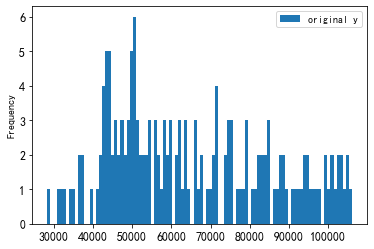

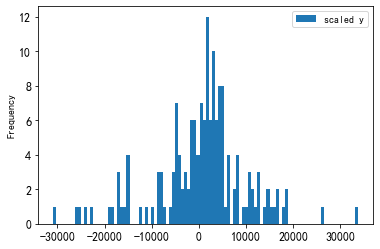

In [522]:
univariate_df[(univariate_df.index >= train_start_dt) & (univariate_df.index < \
    test_start_dt)][['y']].rename(columns={'y':'original y'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={'y':'scaled y'}).plot.hist(bins=100, fontsize=12)
plt.show()

# 根据训练好的归一化模型，对测试集数据归一化。

In [523]:
test['y'] = scaler.transform(test)
test.head()

,y
ds,
2021-07-05,9157.4118
2021-07-06,21380.3124
2021-07-07,102.7992
2021-07-08,-3322.0242
2021-07-09,-2451.3204


# 确定参数p，q

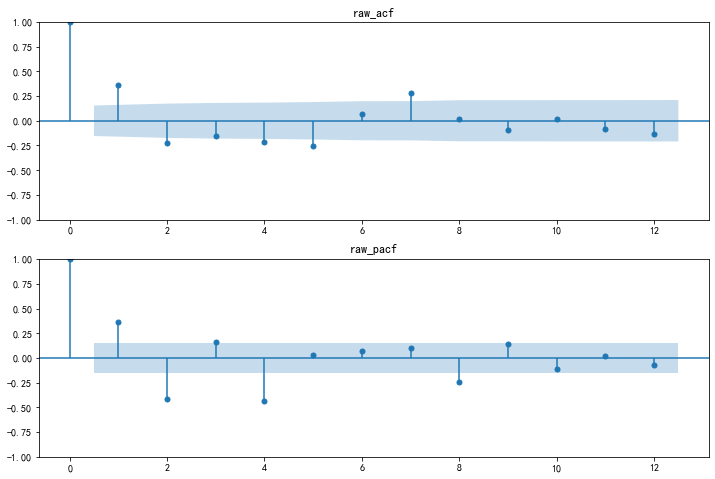

In [524]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2, 1, figsize=(12, 4*2))
# 自相关
plot_acf(train['y'],lags=12,title='raw_acf', ax=axes[0])  
# 偏自相关
plot_pacf(train['y'],lags=12,title='raw_pacf', ax=axes[1])  
fig.savefig('five.png')
plt.show()
# 其中lags 表示滞后的阶数，以上分别得到acf 图和pacf 图。

In [426]:
# 指定要提前预测的步骤数
HORIZON = 1
print('Forecasting horizon:', HORIZON, 'day')

Forecasting horizon: 1 day


In [391]:
# p q 的值
# #对模型p,q进行定阶
# warnings.filterwarnings("ignore") # specify to ignore warning messages
# from statsmodels.tsa.arima_model import ARIMA 
 
# pmax = int(5)    #一般阶数不超过 length /10
# qmax = int(5)
# bic_matrix = []
# for p in range(pmax +1):
#     temp= []
#     for q in range(qmax+1):
#         try:
#             temp.append(ARIMA(data, (p, 1, q)).fit().bic)
#         except:
#             temp.append(None)
#         bic_matrix.append(temp)
 
# bic_matrix = pd.DataFrame(bic_matrix)   #将其转换成Dataframe 数据结构
# p,q = bic_matrix.stack().idxmin()   #先使用stack 展平， 然后使用 idxmin 找出最小值的位置
# print(u'BIC 最小的p值 和 q 值：%s,%s' %(p,q))  #  BIC 最小的p值 和 q 值：0,1

In [461]:
#通过网格搜索对seasonal_order进行定阶,目前就是pdq=011，seasonal_order=2, 2, 1, 52效果比较好，RMSE=202.4582
import itertools  
def get_ARIMA_params(data, pdq, m=12):
    p = d = q = range(0, 3)
    seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
    score_aic = 1000000.0
    warnings.filterwarnings("ignore") # specify to ignore warning messages
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(data,
                                        order=pdq,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('x{}12 - AIC:{}'.format(param_seasonal, results.aic))
        if results.aic < score_aic:
            score_aic = results.aic
            params = param_seasonal, results.aic
    param_seasonal, results.aic = params
    print('x{}12 - AIC:{}'.format(param_seasonal, results.aic))
# pdq = [1, 2, 1]
get_ARIMA_params(train, pdq, m=52)

x(0, 0, 0, 52)12 - AIC:3392.98926691038
x(0, 0, 1, 52)12 - AIC:8162.815328637284
x(0, 0, 2, 52)12 - AIC:1181.0119801740918
x(0, 1, 0, 52)12 - AIC:2320.259613359711
x(0, 1, 1, 52)12 - AIC:1181.057005290755
x(0, 1, 2, 52)12 - AIC:31.378410358015977
x(0, 2, 0, 52)12 - AIC:1225.3038842292888
x(0, 2, 1, 52)12 - AIC:30.294581827083142
x(0, 2, 2, 52)12 - AIC:10.0
x(1, 0, 0, 52)12 - AIC:2320.5300813085096
x(1, 0, 1, 52)12 - AIC:8075.864472871372
x(1, 0, 2, 52)12 - AIC:1183.0118703388316
x(1, 1, 0, 52)12 - AIC:1203.2187181021482
x(1, 1, 1, 52)12 - AIC:1182.8750886377877
x(1, 1, 2, 52)12 - AIC:33.378360014220036
x(1, 2, 0, 52)12 - AIC:52.58914770520114
x(1, 2, 1, 52)12 - AIC:32.294590557911356
x(1, 2, 2, 52)12 - AIC:12.0
x(2, 0, 0, 52)12 - AIC:1202.614975318808
x(2, 0, 1, 52)12 - AIC:2599.5964307254603
x(2, 0, 2, 52)12 - AIC:1184.9401934187808
x(2, 1, 0, 52)12 - AIC:52.755877678113976
x(2, 1, 1, 52)12 - AIC:54.75575719852434
x(2, 1, 2, 52)12 - AIC:35.37813543382384
x(2, 2, 0, 52)12 - AIC:10.0
x(

In [481]:
order = (1, 2, 1)
seasonal_order = (0, 2, 2,52)

model = sm.tsa.statespace.SARIMAX(endog=train, order=order, \
                seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  161
Model:             SARIMAX(1, 2, 1)x(0, 2, [1, 2], 52)   Log Likelihood                -624.306
Date:                                 Thu, 28 Apr 2022   AIC                           1258.613
Time:                                         13:40:39   BIC                           1268.650
Sample:                                              0   HQIC                          1262.494
                                                 - 161                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2413      0.479      0.504      0.614      -0.697       1

# 模型评估

In [463]:
test_shifted = test.copy()

for t in range(1, HORIZON+1):
    test_shifted['y+'+str(t)] = test_shifted['y'].shift(-t, freq='d')

test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,y,y+1
ds,,
2021-07-05,9157.4118,21380.3124
2021-07-06,21380.3124,102.7992
2021-07-07,102.7992,-3322.0242
2021-07-08,-3322.0242,-2451.3204
2021-07-09,-2451.3204,-4013.5572


In [464]:
test_shifted = test.copy()

for t in range(1, HORIZON+1):
    test_shifted['y+'+str(t)] = test_shifted['y'].shift(-t, freq='d')

test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,y,y+1
ds,,
2021-07-05,9157.4118,21380.3124
2021-07-06,21380.3124,102.7992
2021-07-07,102.7992,-3322.0242
2021-07-08,-3322.0242,-2451.3204
2021-07-09,-2451.3204,-4013.5572


# 时间滑动窗口预测

In [465]:
%%time
training_window = 720 # 投入30天(720小时)进行训练

train_ts = train['y']
test_ts = test_shifted

history = [x for x in train_ts]
history = history[(-training_window):]

predictions = list()

order = (1, 2, 1)
seasonal_order = (1, 2, 2, 24)

for t in range(test_ts.shape[0]):
    model = sm.tsa.statespace.SARIMAX(endog=history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    yhat = model_fit.forecast(steps = HORIZON)
    predictions.append(yhat)
    obs = list(test_ts.iloc[t])
    # move the training window
    history.append(obs[0])
    history.pop(0)
    print(test_ts.index[t])
    print(t+1, ': predicted =', yhat, 'expected =', obs)

2021-07-05 00:00:00
1 : predicted = [16028.94067931] expected = [9157.411800000002, 21380.312399999995]
2021-07-06 00:00:00
2 : predicted = [20052.16134939] expected = [21380.312399999995, 102.79919999999402]
2021-07-07 00:00:00
3 : predicted = [-557.91370081] expected = [102.79919999999402, -3322.0242]
2021-07-08 00:00:00
4 : predicted = [-646.94001356] expected = [-3322.0242, -2451.320399999997]
2021-07-09 00:00:00
5 : predicted = [1732.50455398] expected = [-2451.320399999997, -4013.5571999999956]
2021-07-10 00:00:00
6 : predicted = [14920.99897046] expected = [-4013.5571999999956, -14216.968800000002]
2021-07-11 00:00:00
7 : predicted = [-9836.20123993] expected = [-14216.968800000002, 13619.287799999991]
2021-07-12 00:00:00
8 : predicted = [-19706.85617737] expected = [13619.287799999991, 21576.6192]
2021-07-13 00:00:00
9 : predicted = [19501.60904425] expected = [21576.6192, 393.61320000000705]
2021-07-14 00:00:00
10 : predicted = [6065.5244081] expected = [393.61320000000705, 97

In [467]:
len(predictions)

57

In [468]:
test_ts1 = test_ts.copy()
test_ts1['ds'] = test_ts.index
test_ts1.rename(columns={'ds':'date'},inplace=True)
test_ts1.head()

,y,y+1,date
ds,,,
2021-07-05,9157.4118,21380.3124,2021-07-05
2021-07-06,21380.3124,102.7992,2021-07-06
2021-07-07,102.7992,-3322.0242,2021-07-07
2021-07-08,-3322.0242,-2451.3204,2021-07-08
2021-07-09,-2451.3204,-4013.5572,2021-07-09


In [469]:
# test_ts = pd.DataFrame(test_ts, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
test_ts['ds'] = test_ts.index
test_ts.rename(columns={'ds':'date'},inplace=True)
test_ts.head()

,y,y+1,date
ds,,,
2021-07-05,9157.4118,21380.3124,2021-07-05
2021-07-06,21380.3124,102.7992,2021-07-06
2021-07-07,102.7992,-3322.0242,2021-07-07
2021-07-08,-3322.0242,-2451.3204,2021-07-08
2021-07-09,-2451.3204,-4013.5572,2021-07-09


In [474]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['ds'] = test.index[0:len(test.index)-HORIZON]
eval_df = pd.melt(eval_df, id_vars='ds', value_name='prediction', var_name='h')
# eval_df['actual_1'] = test_ts
# eval_df[['prediction', 'actual']] = scaler.inverse_transform(eval_df[['prediction', 'actual']])
eval_df.rename(columns={'ds':'date'},inplace=True) 
test_ts.dropna(axis=0, how='any', inplace=True)
eval_df = pd.merge(eval_df,test_ts,on='date',how='right')
eval_df.head()

,date,h,prediction,y,y+1
0,2021-07-05,t+1,16028.940679,9157.4118,21380.3124
1,2021-07-06,t+1,20052.161349,21380.3124,102.7992
2,2021-07-07,t+1,-557.913701,102.7992,-3322.0242
3,2021-07-08,t+1,-646.940014,-3322.0242,-2451.3204
4,2021-07-09,t+1,1732.504554,-2451.3204,-4013.5572


In [471]:
eval_df.head()

,t+1
0,16028.940679
1,20052.161349
2,-557.913701
3,-646.940014
4,1732.504554


# 评估模型的准确性

In [475]:
if(HORIZON > 1):
    eval_df['APE'] = (eval_df['prediction'] - eval_df['y']).abs() / eval_df['y']
    print(eval_df.groupby('h')['APE'].mean())

In [476]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true))

In [477]:
print('One step forecast MAPE: ', 
      (mape(eval_df[eval_df['h'] == 't+1']['prediction'], 
      eval_df[eval_df['h'] == 't+1']['y'])
      )*100, '%')

One step forecast MAPE:  235.13222088530316 %


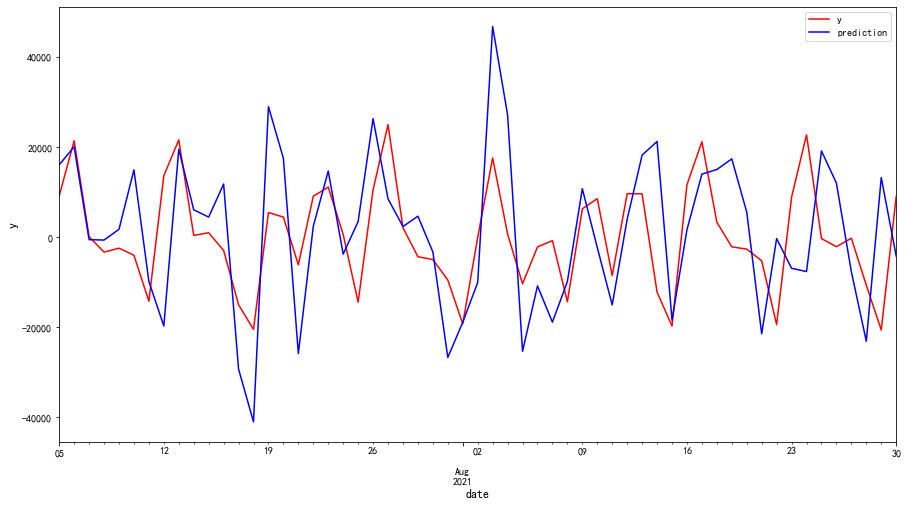

In [530]:
 if(HORIZON == 1):
    ## Plotting single step forecast
    eval_df.plot(x='date', y=['y', 'prediction'], style=['r', 'b'], figsize=(15, 8))

else:
    ## Plotting multi step forecast
    plot_df = eval_df[(eval_df.h=='t+1')][['date', 'y']]
    for t in range(1, HORIZON+1):
        plot_df['t+'+str(t)] = eval_df[(eval_df.h=='t+'+str(t))]['prediction'].values

    fig = plt.figure(figsize=(15, 8))
    ax = plt.plot(plot_df['date'], plot_df['actual'], color='red', linewidth=4.0)
    ax = fig.add_subplot(111)
    for t in range(1, HORIZON+1):
        x = plot_df['timestamp'][(t-1):]
        y = plot_df['t+'+str(t)][0:len(x)]
        ax.plot(x, y, color='blue', linewidth=4*math.pow(.9,t), alpha=math.pow(0.8,t))

    ax.legend(loc='best')

plt.xlabel('date', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.savefig('six.png')
plt.show()

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
# prepare training dataset
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
# make predictions
predictions = list()
for t in range(len(test)):
model = ARIMA(history, order=arima_order)
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(test[t])
# calculate out of sample error
error = mean_squared_error(test, predictions)
    return error

In [283]:
# diff1.dropna(inplace=True) 
# fig = plt.figure(figsize=(12,8)) 
# ax1=fig.add_subplot(211) 
# fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1) 
# ax2 = fig.add_subplot(212) 
# fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)


# 商业行业最大有功功率模型训练

In [29]:
# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.ARIMA(y_train, order=(1,2,1)) 
model_fit = model.fit()
y_pred = model_fit.forecast(len(y_valid))
# , se, conf
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))
print(y_pred)

778    36858.372454
779    36936.623620
780    36974.986431
781    37024.448553
782    37070.822188
           ...     
968    45821.516243
969    45868.562198
970    45915.608154
971    45962.654109
972    46009.700064
Name: predicted_mean, Length: 195, dtype: float64


# 商业行业的精度分析(4种评价方式)

In [30]:
import numpy as np
from sklearn import metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true))
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
print('MSE:',metrics.mean_squared_error(y_true, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('MAE:',metrics.mean_absolute_error(y_true, y_pred)) 
print('MAPE:',mape(y_true, y_pred))

MSE: 1782983335.486869
RMSE: 42225.387333769584
MAE: 37777.55416752609
MAPE: 0.43423308316655373


# 预测结果

In [31]:
y = pd.read_excel(r"data/未来三个月每天.xls")
pred =  model_fit.forecast(len(y))

In [32]:
pred.head()

778    36858.372454
779    36936.623620
780    36974.986431
781    37024.448553
782    37070.822188
Name: predicted_mean, dtype: float64

In [33]:
y

,数据时间
0,2021-08-31
1,2021-09-01
2,2021-09-02
3,2021-09-03
4,2021-09-04
...,...
87,2021-11-26
88,2021-11-27
89,2021-11-28
90,2021-11-29


# 保存数据

In [34]:
y['数据时间'] = y['数据时间'].astype(str)
y['商业行业未来最大总有功功率(KM)'] = pd.DataFrame(pred).values

y

,数据时间,商业行业未来最大总有功功率(KM)
0,2021-08-31,36858.372454
1,2021-09-01,36936.623620
2,2021-09-02,36974.986431
3,2021-09-03,37024.448553
4,2021-09-04,37070.822188
...,...,...
87,2021-11-26,40975.782839
88,2021-11-27,41022.828794
89,2021-11-28,41069.874750
90,2021-11-29,41116.920705


# 商业最小总总有功功率预测

In [35]:
df = metrics_df1.fillna(0)
univariate_df = df[['date', '商业']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))
import statsmodels.api as sm
# model = sm.tsa.ARIMA(y_train, order=(1,1,1)) 

# from statsmodels.tsa.arima_model import ARIMA

# Fit model
model = sm.tsa.ARIMA(y_train, order=(0,0,1))
model_fit = model.fit()

# Pediction with ARIMA
y_pred= model_fit.forecast(len(y_valid))
# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
print('MSE:',metrics.mean_squared_error(y_true, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('MAE:',metrics.mean_absolute_error(y_true, y_pred)) 
print('MAPE:',mape(y_true, y_pred))
pred =  model_fit.forecast(len(y))
y['商业最小总有功功率(KM)'] = pd.DataFrame(pred).values

778 195
MSE: 21503104.173006106
RMSE: 4637.1439672503275
MAE: 3492.362045251431
MAPE: 1.9276388972912863


# 大工业用电行业最大和最小有功功率预测

In [99]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size
df = metrics_df1.fillna(0)
univariate_df = df[['date', '大工业用电']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))
# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# model = sm.tsa.ARIMA(y_train, order=(1,1,1)) 
# Fit modelsm.tsa.ARIMA
model = sm.tsa.ARIMA(y_train, order=(0 ,0,1))
model_fit = model.fit()

# Pediction with ARIMA
y_pred = model_fit.forecast(len(y_valid))
# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
print('最大有功功率MSE:',metrics.mean_squared_error(y_true, y_pred))
print('最大有功功率RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('最大有功功率MAE:',metrics.mean_absolute_error(y_true, y_pred)) 
print('最大有功功率MAPE:',mape(y_true, y_pred))
pred =  model_fit.forecast(len(y))
y['大工业用电最大总有功功率(KM)'] = pd.DataFrame(pred).values
train_size = int(0.85 * len(df))
test_size = len(df) - train_size
df = metrics_df1.fillna(0)
univariate_df = df[['date', '大工业用电']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))
# from statsmodels.tsa.arima_model import ARIMA

# Fit model

model = sm.tsa.ARIMA(y_train, order=(0 ,0,1))
model_fit = model.fit()

# Pediction with ARIMA
y_pred = model_fit.forecast(len(y_valid))
# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
print('最小有功功率MSE:',metrics.mean_squared_error(y_true, y_pred))
print('最小有功功率RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('最小有功功率MAE:',metrics.mean_absolute_error(y_true, y_pred)) 
print('最小有功功率MAPE:',mape(y_true, y_pred))
pred =  model_fit.forecast(len(y))
y['大工业用电最小总有功功率(KM)'] = pd.DataFrame(pred).values

827 146
最大有功功率MSE: 505812468.689925
最大有功功率RMSE: 22490.274980309267
最大有功功率MAE: 14259.930906113801
最大有功功率MAPE: 2.4758620407206213
827 146
最小有功功率MSE: 505812468.689925
最小有功功率RMSE: 22490.274980309267
最小有功功率MAE: 14259.930906113801
最小有功功率MAPE: 2.4758620407206213


# 普通工业行业最大和最小有功功率预测

In [100]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size
df = metrics_df.fillna(0)
univariate_df = df[['date', '普通工业']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))
# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# Fit model
model = sm.tsa.ARIMA(y_train, order=(0 ,0,1))
model_fit = model.fit()

# Pediction with ARIMA
y_pred = model_fit.forecast(len(y_valid))
# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
print('最大有功功率MSE:',metrics.mean_squared_error(y_true, y_pred))
print('最大有功功率RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('最大有功功率MAE:',metrics.mean_absolute_error(y_true, y_pred)) 
print('最大有功功率MAPE:',mape(y_true, y_pred))
pred =  model_fit.forecast(len(y))
y['普通工业最大总有功功率(KM)'] = pd.DataFrame(pred).values

train_size = int(0.85 * len(df))
test_size = len(df) - train_size
df = metrics_df1.fillna(0)
univariate_df = df[['date', '普通工业']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))


# Fit model
model = sm.tsa.ARIMA(y_train, order=(0 ,0,1))
model_fit = model.fit()

# Pediction with ARIMA
y_pred = model_fit.forecast(len(y_valid))
# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
print('最小有功功率MSE:',metrics.mean_squared_error(y_true, y_pred))
print('最小有功功率RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('最小有功功率MAE:',metrics.mean_absolute_error(y_true, y_pred)) 
print('最小有功功率MAPE:',mape(y_true, y_pred))
pred =  model_fit.forecast(len(y))
y['普通工业最小总有功功率(KM)'] = pd.DataFrame(pred).values

827 146
最大有功功率MSE: 5751059.193391578
最大有功功率RMSE: 2398.136608575829
最大有功功率MAE: 2103.920901038341
最大有功功率MAPE: 0.28363185070775093
827 146
最小有功功率MSE: 1066561.6782921075
最小有功功率RMSE: 1032.7447304596174
最小有功功率MAE: 749.3176665471696
最小有功功率MAPE: 2.441080196625541


# 非普通工业最大最小预测

In [101]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size
df = metrics_df.fillna(0)
univariate_df = df[['date', '非普工业']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))
import statsmodels.api as sm


# Fit model
model = sm.tsa.ARIMA(y_train, order=(0 ,0,1))
model_fit = model.fit()

# Pediction with ARIMA
y_pred = model_fit.forecast(len(y_valid))
# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
print('最大有功功率MSE:',metrics.mean_squared_error(y_true, y_pred))
print('最大有功功率RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('最大有功功率MAE:',metrics.mean_absolute_error(y_true, y_pred)) 
print('最大有功功率MAPE:',mape(y_true, y_pred))
pred =  model_fit.forecast(len(y))
pred =  model_fit.forecast(len(y))
y['非普工业最大总有功功率(KM)'] = pd.DataFrame(pred).values

train_size = int(0.85 * len(df))
test_size = len(df) - train_size
df = metrics_df1.fillna(0)
univariate_df = df[['date', '非普工业']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

# Fit model
model = sm.tsa.ARIMA(y_train, order=(0 ,0,1))
model_fit = model.fit()

# Pediction with ARIMA
y_pred = model_fit.forecast(len(y_valid))
# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
print('最小有功功率MSE:',metrics.mean_squared_error(y_true, y_pred))
print('最小有功功率RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('最小有功功率MAE:',metrics.mean_absolute_error(y_true, y_pred)) 
print('最小有功功率MAPE:',mape(y_true, y_pred))
pred =  model_fit.forecast(len(y))
y['非普工业最小总有功功率(KM)'] = pd.DataFrame(pred).values

827 146
最大有功功率MSE: 1999738.025150666
最大有功功率RMSE: 1414.1209372435817
最大有功功率MAE: 1311.552025044219
最大有功功率MAPE: 0.4340207274827628
827 146
最小有功功率MSE: 380126.22196910967
最小有功功率RMSE: 616.5437713326684
最小有功功率MAE: 581.6216068911732
最小有功功率MAPE: 3.7002541636418194


# 最终结果保存

In [105]:
y.to_csv('data/第二大问第二小问结果.csv',index=0)

In [104]:
y

,数据时间,商业行业未来最大总有功功率(KM),商业最小总有功功率(KM),大工业用电最大总有功功率(KM),大工业用电最小总有功功率(KM),普通工业最大总有功功率(KM),普通工业最小总有功功率(KM),非普工业最大总有功功率(KM),非普工业最小总有功功率(KM)
0,2021-08-31,910.712896,16279.294536,89581.634610,89581.634610,6278.621354,3057.304132,1695.659592,910.712896
1,2021-09-01,694.994325,16473.403206,81650.629585,81650.629585,7877.881872,3420.524054,1563.258384,694.994325
2,2021-09-02,694.994325,16473.403206,81650.629585,81650.629585,7877.881872,3420.524054,1563.258384,694.994325
3,2021-09-03,694.994325,16473.403206,81650.629585,81650.629585,7877.881872,3420.524054,1563.258384,694.994325
4,2021-09-04,694.994325,16473.403206,81650.629585,81650.629585,7877.881872,3420.524054,1563.258384,694.994325
...,...,...,...,...,...,...,...,...,...
87,2021-11-26,694.994325,16473.403206,81650.629585,81650.629585,7877.881872,3420.524054,1563.258384,694.994325
88,2021-11-27,694.994325,16473.403206,81650.629585,81650.629585,7877.881872,3420.524054,1563.258384,694.994325
89,2021-11-28,694.994325,16473.403206,81650.629585,81650.629585,7877.881872,3420.524054,1563.258384,694.994325
90,2021-11-29,694.994325,16473.403206,81650.629585,81650.629585,7877.881872,3420.524054,1563.258384,694.994325
